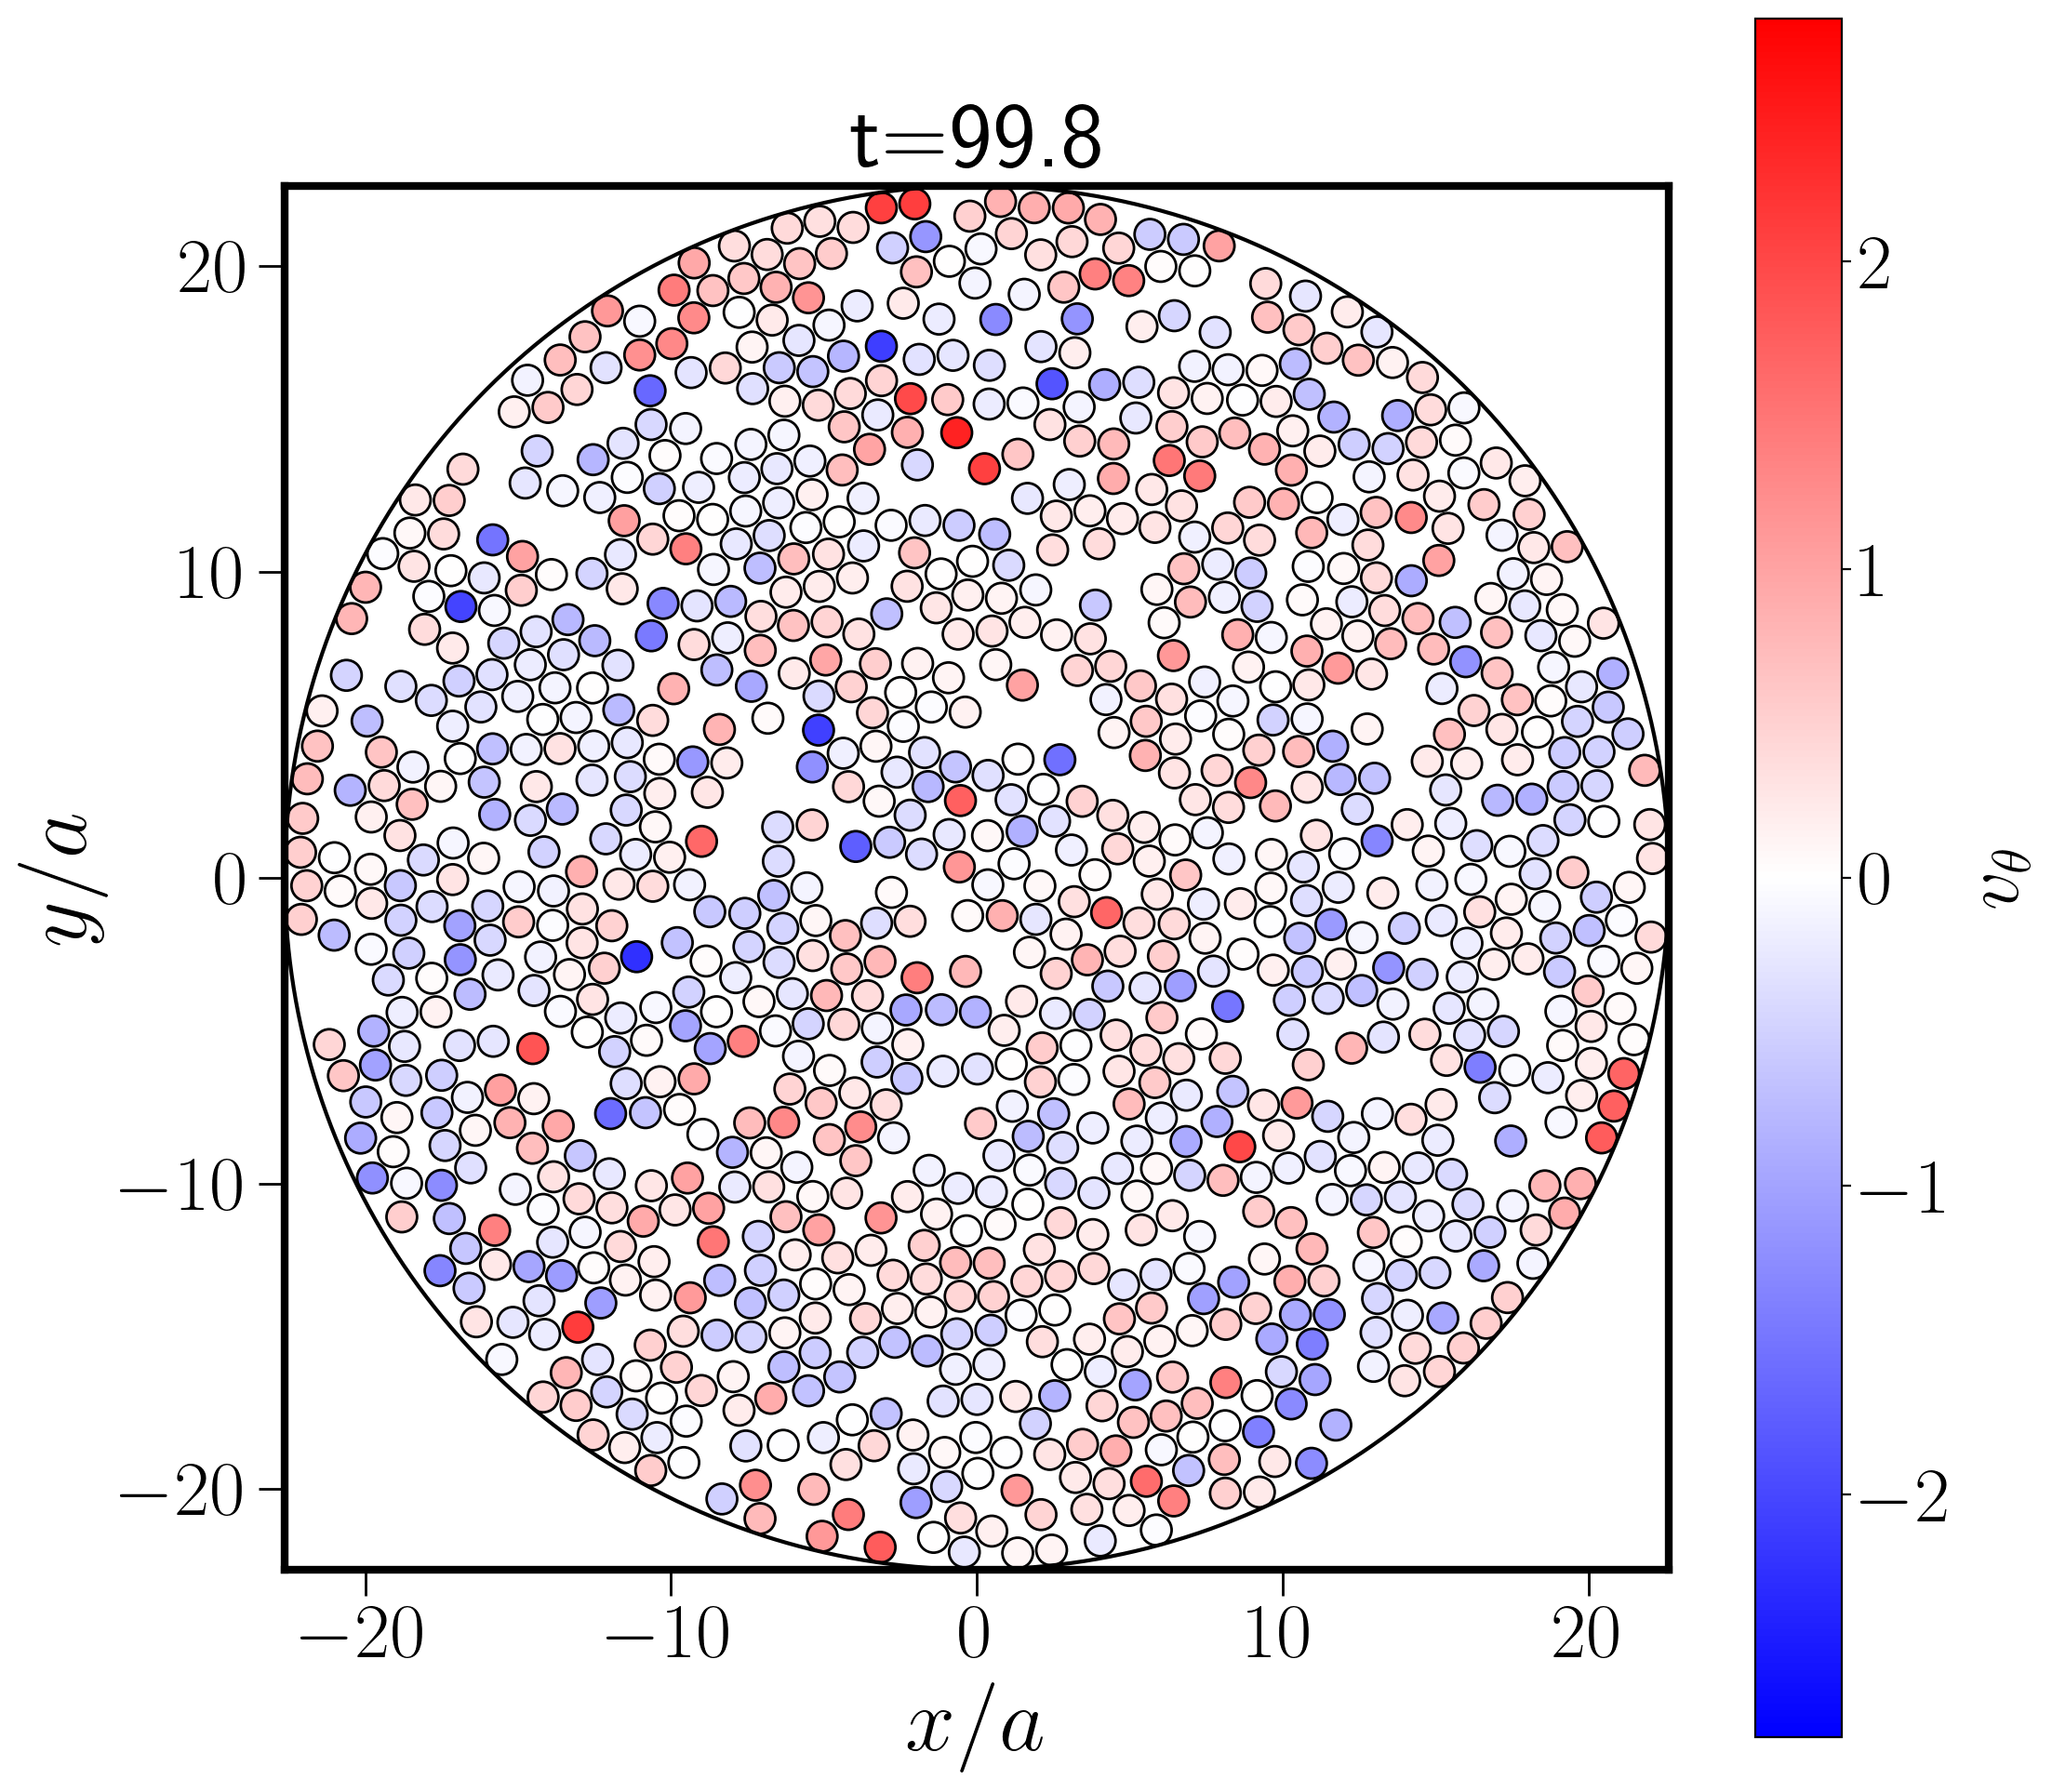

In [3]:
%matplotlib inline
import math
import matplotlib
%config InlineBackend.figure_format = 'retina'
import matplotlib.cm as cm  # colormap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
plt.rcParams["text.usetex"] =True
plt.rcParams["font.size"] = 30
#from matplotlib import patches
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
from matplotlib.cm import  get_cmap
cmap = get_cmap('jet')
Np=1024#8192#2048#
moji="reawt"
L=22.627#64#128#33.93323376#100#143#28.3921935#40#
tau=10#100.
v0=1
Mg=1
min=0#minを有限にする機能はまだ;
max=999
filenum=max-min
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
def circleplot():
    t = np.linspace(0,np.pi*2,1000)
    x = L * np.cos(t)
    y = L * np.sin(t)
    plt.plot(x,y,"-",color="k",markersize=20)
# plt.rcParams["patch.linewidth"]=0.5
p = PatchCollection([], cmap=matplotlib.cm.bwr, alpha=1.0,fc='k')
ax.add_collection(p)
title=plt.title("t")
circleplot()
plt.xlim(-L, L)
plt.ylim(-L, L)
#cbのために適当なマップをダス:;
# Normalize~mappable~colorbar(mappable)でも可。(粒子数が多いときはこちらの方が良いかも?);
# アニメーション内部でプロットしたい場合は(update_normal(mappable)？使う前に検討);
t,x, y,vx,a,lz = np.loadtxt("C:\\Users\\ikedah\\Documents\\sotukenn\\workspace\\refwca\\{}_coorv0{:.1f}tau{:.3f}m{:.3f}R{:.1f}\\tyouwaenn_R{:.3f}_tau{:.3f}_m{:.3f}_t{}.dat".format(moji,v0,tau,Mg,L,L,tau,Mg,1), comments='#', unpack=True)
lz=lz/np.sqrt(np.square(x)+np.square(y))
vminmax=np.amax(np.abs(lz))
p.set_clim(vmin=-vminmax, vmax=vminmax) 
patches=[]
for i in range(Np):
    a[i]=0.5
    circle = mpatches.Circle((x[i],y[i]), a[i])
    patches.append(circle)
p.set_paths(patches)
p.set_array(lz)
C=plt.colorbar(p,label=r"$v_{\theta}$")
"""
#カラーバーの上下端を明確に操作したければこっち
#速さは不明
from matplotlib.colors import Normalize
from matplotlib.cm import  ScalarMappable
norm = Normalize(vmin=-vminmax, vmax=vminmax)
mappable = ScalarMappable(cmap=cmap, norm=norm)
mappable._A = []
C=plt.colorbar(mappable,shrink=0.6,label=r"$v_{\theta}$")
    """

ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
plt.tick_params(which='major',width = 1, length = 10)
plt.tick_params(which='minor',width = 1, length = 5)
plt.xlabel(r"$x/a$",color='k', size=35)
plt.ylabel(r"$y/a$",color='k', size=35)
def init():
    """
    何もしない関数。Funkanimationのinitfunkに何も指定しないとupdate_animのj＝0を2回繰り返される.
    本来は軸設定をするところ;
    """
    pass
def update_anim(j):
    """アニメーションのための関数。引数を増やしたい場合はFunkanimationでfargs=()とする;

    Args:
        j (int): Funkanimationで渡される引数。0からfilemax;

    Returns:
        mappable: 時刻jでのマップ;
    """
    t,x, y,vx,a,lz = np.loadtxt("C:\\Users\\ikedah\\Documents\\sotukenn\\workspace\\refwca\\{}_coorv0{:.1f}tau{:.3f}m{:.3f}R{:.1f}\\tyouwaenn_R{:.3f}_tau{:.3f}_m{:.3f}_t{}.dat".format(moji,v0,tau,Mg,L,L,tau,Mg,j+1), comments='#', unpack=True)
    lz/=np.sqrt(np.square(x)+np.square(y))
    patches=[]
    for i in range(Np):
        a[i]=0.5
        circle = mpatches.Circle((x[i],y[i]), a[i])
        patches.append(circle)
    p.set_paths(patches)
    p.set_array(lz)
    p.set_edgecolor("k")
    title.set_text("t={}".format(t[0]))#plt.titleでもなぜか上手くいくことがある.
    return [p]
    
ani = FuncAnimation(fig, update_anim,init_func=init(), interval=100, blit=True, frames = filenum)

#保存
ani.save("{}tau{}mg{}v0{}R{}bwr.mp4".format(moji,tau,Mg,v0,L),writer="ffmpeg")
plt.show()


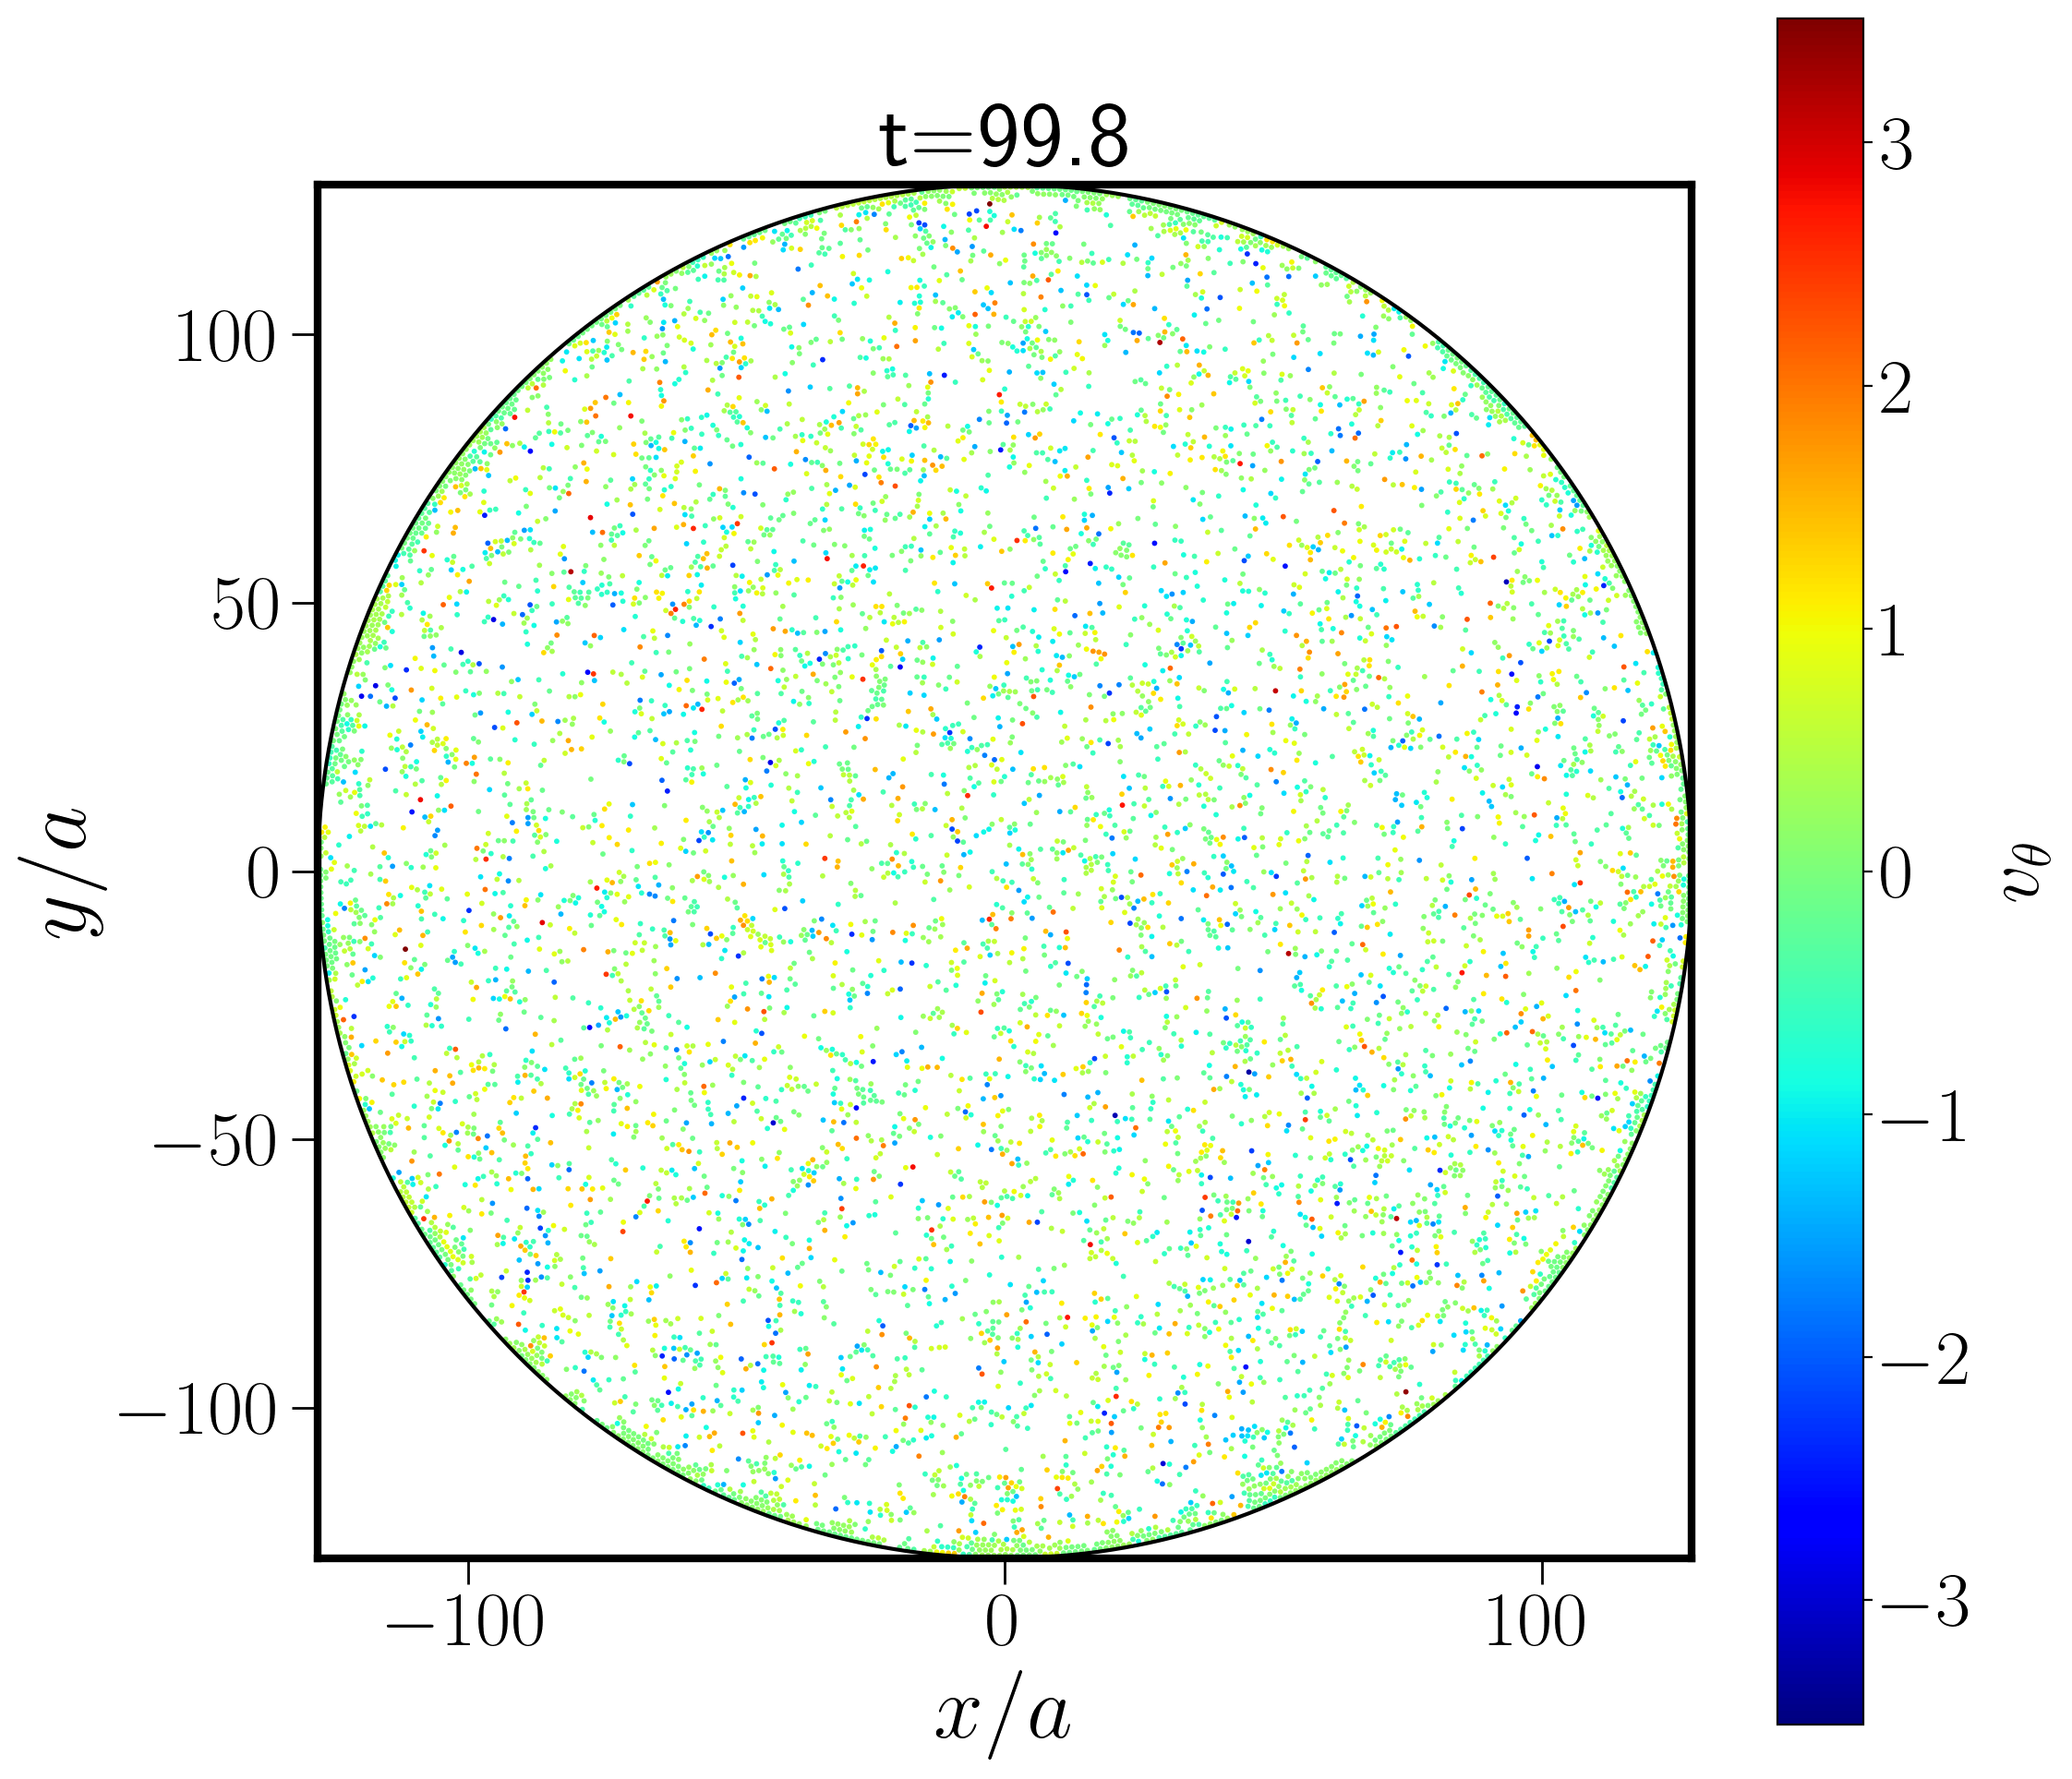

In [ ]:
%matplotlib inline
import math
import matplotlib
%config InlineBackend.figure_format = 'retina'
import matplotlib.cm as cm  # colormap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
plt.rcParams["text.usetex"] =True
plt.rcParams["font.size"] = 30
#from matplotlib import patches
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
from matplotlib.cm import  get_cmap
cmap = get_cmap('jet')
Np=8192#1024#2048#
moji="reawt"
L=128#64#22.627#33.93323376#100#143#28.3921935#40#
tau=10#100.
v0=1
Mg=0.01
min=0#minを有限にする機能はまだ;
max=999
filenum=max-min
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
def circleplot():
    t = np.linspace(0,np.pi*2,1000)
    x = L * np.cos(t)
    y = L * np.sin(t)
    plt.plot(x,y,"-",color="k",markersize=20)
patches=[]
for i in range(Np):
    circle=mpatches.Circle([],[],0.5)
    patches.append(circle)
p = PatchCollection(patches, cmap=matplotlib.cm.bwr, alpha=1.0,fc='k',ec="k")
ax.add_collection(p)
title=plt.title("t")
circleplot()
plt.xlim(-L, L)
plt.ylim(-L, L)
#cbのために適当なマップをダス:;
# Normalize~mappable~colorbar(mappable)でも可。(粒子数が多いときはこちらの方が良いかも?);
# アニメーション内部でプロットしたい場合は(update_normal(mappable)？使う前に検討);
t,x, y,vx,a,lz = np.loadtxt("C:\\Users\\ikedah\\Documents\\sotukenn\\workspace\\refwca\\{}_coorv0{:.1f}tau{:.3f}m{:.3f}R{:.1f}\\tyouwaenn_R{:.3f}_tau{:.3f}_m{:.3f}_t{}.dat".format(moji,v0,tau,Mg,L,L,tau,Mg,1), comments='#', unpack=True)
lz=lz/np.sqrt(np.square(x)+np.square(y))
vminmax=np.amax(np.abs(lz))
p.set_clim(vmin=-vminmax, vmax=vminmax) 
p.set_offsets(np.c_(x,y))
p.set_array(lz)
C=plt.colorbar(p,label=r"$v_{\theta}$")
"""
#カラーバーの上下端を明確に操作したければこっち
#速さは不明
from matplotlib.colors import Normalize
from matplotlib.cm import  ScalarMappable
norm = Normalize(vmin=-vminmax, vmax=vminmax)
mappable = ScalarMappable(cmap=cmap, norm=norm)
mappable._A = []
C=plt.colorbar(mappable,shrink=0.6,label=r"$v_{\theta}$")
    """

ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
plt.tick_params(which='major',width = 1, length = 10)
plt.tick_params(which='minor',width = 1, length = 5)
plt.xlabel(r"$x/a$",color='k', size=35)
plt.ylabel(r"$y/a$",color='k', size=35)
def init():
    """
    何もしない関数。Funkanimationのinitfunkに何も指定しないとupdate_animのj＝0を2回繰り返される.
    本来は軸設定をするところ;
    """
    pass
def update_anim(j):
    """アニメーションのための関数。引数を増やしたい場合はFunkanimationでfargs=()とする;

    Args:
        j (int): Funkanimationで渡される引数。0からfilemax;

    Returns:
        mappable: 時刻jでのマップ;
    """
    t,x, y,vx,a,lz = np.loadtxt("C:\\Users\\ikedah\\Documents\\sotukenn\\workspace\\refwca\\{}_coorv0{:.1f}tau{:.3f}m{:.3f}R{:.1f}\\tyouwaenn_R{:.3f}_tau{:.3f}_m{:.3f}_t{}.dat".format(moji,v0,tau,Mg,L,L,tau,Mg,j+1), comments='#', unpack=True)
    lz/=np.sqrt(np.square(x)+np.square(y))
    patches=[]
    p.set_offsets(np.c_(x,y))
    p.set(paths=patches,array=lz)
    title.set_text("t={}".format(t[0]))#plt.titleでもなぜか上手くいくことがある.
    return [p]
    
ani = FuncAnimation(fig, update_anim,init_func=init(), interval=100, blit=True, frames = filenum)

#保存
ani.save("{}tau{}mg{}v0{}R{}.mp4".format(moji,tau,Mg,v0,L),writer="ffmpeg")
plt.show()


In [2]:
%matplotlib inline
import math
import matplotlib
%config InlineBackend.figure_format = 'retina'
import matplotlib.cm as cm  # colormap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
plt.rcParams["text.usetex"] =True
plt.rcParams["font.size"] = 30
#from matplotlib import patches
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
from matplotlib.colors import Normalize
from matplotlib.cm import  get_cmap,ScalarMappable
cmap = get_cmap('jet')
Np=8192#1024#2048#
moji="reawt"
L=64#22.627#33.93323376#100#143#28.3921935#40#
tau=10#100.
v0=100
Mg=0.01
min=0
max=1000
filenum=max-min
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
circl=[[]for i in range(Np)]
ax.set_aspect('equal')
def circleplot():
    t = np.linspace(0,np.pi*2,1000)
    x = L * np.cos(t)
    y = L * np.sin(t)
    plt.plot(x,y,"-",color="k",markersize=20)
for i in range(Np):
    circl[i]=mpatches.Circle((0,0),0.5)
    ax.add_patch(circl[i])
title=plt.title("t")
circleplot()
plt.xlim(-L, L)
plt.ylim(-L, L) 
#cbのために適当なマップをダス:;
# Normalize~mappable~colorbar(mappable)でも可。(粒子数が多いときはこちらの方が良いかも);
# アニメーション内部でプロットしたい場合はif j==0:;
t,x, y,vx,a,lz = np.loadtxt("C:\\Users\\ikedah\\Documents\\sotukenn\\workspace\\refwca\\{}_coorv0{:.1f}tau{:.3f}m{:.3f}R{:.1f}\\tyouwaenn_R{:.3f}_tau{:.3f}_m{:.3f}_t{}.dat".format(moji,v0,tau,Mg,L,L,tau,Mg,1), comments='#', unpack=True)
lz=lz/np.sqrt(np.square(x)+np.square(y))
vminmax=np.amax(np.abs(lz))
norm = Normalize(vmin=-vminmax, vmax=vminmax)
mappable = ScalarMappable(cmap=cmap, norm=norm)
mappable._A = []
C=plt.colorbar(mappable,shrink=0.6,label=r"$v_{\theta}$")

ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
plt.tick_params(which='major',width = 1, length = 10)
plt.tick_params(which='minor',width = 1, length = 5)
plt.xlabel(r"$x/a$",color='k', size=35)
plt.ylabel(r"$y/a$",color='k', size=35)
def init():
    pass
def update_anim(j):#                                                                        /%s_coorv0%.1ftau%.3fm%.3fR%.1f/
    t,x, y,vx,a,lz = np.loadtxt("C:\\Users\\ikedah\\Documents\\sotukenn\\workspace\\refwca\\{}_coorv0{:.1f}tau{:.3f}m{:.3f}R{:.1f}\\tyouwaenn_R{:.3f}_tau{:.3f}_m{:.3f}_t{}.dat".format(moji,v0,tau,Mg,L,L,tau,Mg,j+1), comments='#', unpack=True)
    lz/=np.sqrt(np.square(x)+np.square(y))
    for i in range(Np):
        a[i]=0.5
        circl[i].set(center=(x[i],y[i]),radius=a[i],fc=cmap(norm(lz[i])))
    title.set_text("t={}".format(t[0]))
    return [title]
    
ani = FuncAnimation(fig, update_anim,init_func=init(), interval=100, blit=True, frames = filenum)

#保存
ani.save("{}tau{}mg{}v0{}R{}v2.mp4".format(moji,tau,Mg,v0,L),writer="ffmpeg")
plt.show()


C:\Users\ikedah\AppData\Local\Temp\ipykernel_11104\2035288544.py:52: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  C=plt.colorbar(mappable,shrink=0.6,label=r"$v_{\theta}$")


KeyboardInterrupt: 

ValueError: need at least one array to concatenate

<Figure size 1200x1200 with 2 Axes>